In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

In [19]:
dataframe = pd.read_csv('boston_x_y_train.csv')

x = dataframe.drop(dataframe.columns[[-1]], axis = 1, inplace = False)
X = x.to_numpy()

y = dataframe.drop(dataframe.iloc[:, 0:13], inplace = False, axis = 1)
Y = y.to_numpy()
Y = np.reshape(Y, -1)


In [20]:
x_y = dataframe.copy()

x_y.insert(13, 'C', np.zeros(len(x_y)), True)  
X_Y = x_y.to_numpy()
print(X_Y)
print(x_y)

[[-0.40784991 -0.48772236 -1.2660231  ... -1.09799011  0.
  37.9       ]
 [-0.40737368 -0.48772236  0.24705682 ... -0.52047412  0.
  21.4       ]
 [ 0.1251786  -0.48772236  1.01599907 ...  0.89107588  0.
  12.7       ]
 ...
 [-0.40831101 -0.48772236  0.24705682 ... -0.33404299  0.
  20.8       ]
 [-0.41061997 -0.48772236 -1.15221381 ... -0.74475218  0.
  22.6       ]
 [ 0.34290895 -0.48772236  1.01599907 ... -1.35871335  0.
  50.        ]]
       # CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.407850 -0.487722 -1.266023 -0.272599 -0.576134  1.239974  0.840122   
1   -0.407374 -0.487722  0.247057 -0.272599 -1.016689  0.001946 -0.838337   
2    0.125179 -0.487722  1.015999 -0.272599  1.367490 -0.439699  0.687212   
3    0.028304 -0.487722  1.015999 -0.272599  1.859875 -0.047918  0.801005   
4   -0.412408 -0.487722 -0.969827 -0.272599 -0.913029 -0.384137 -0.834781   
..        ...       ...       ...       ...       ...       ...       ...   
374 -0.204929 -0.

In [ ]:
print(x)
print(y)

In [ ]:
print(X)
print(Y)

In [21]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(284, 13)
(95, 13)
(284,)
(95,)


# Gradient_Descnt Inbuilt in SciKit-learn

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
grad_alg1 = GradientBoostingRegressor()

In [24]:
grad_alg1.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
'''from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x_train, y_train)'''

In [25]:
y_pred = grad_alg1.predict(x_test)
print(y_pred)

[ 6.9309672  20.72773789 19.1167124  24.63282773 40.48921899 32.46100221
 39.87502138 20.59668011 20.41263254 14.73538457 23.70522881 20.48410316
 16.6510938  19.23353635 16.80784708 17.30594827 27.67767082 16.79878277
 12.93166888 12.9845823  17.59328384 18.98884299 19.5504461  24.56725896
 23.96514502 17.40862356 40.76751197 15.85544099 23.10954278 20.55139779
 46.62719594 19.98407041 13.51799355 17.26828443 14.8055693  15.46615481
 21.24431018 20.38735777 37.92222004 20.43291057 45.88976812 24.72445024
 43.48533567 11.84304376 23.39352513 20.56049899 25.19136516 40.47120428
 30.17860534 21.74101761 16.79394126 22.84856161 40.74855138 21.13325774
 10.02716322 26.5983241  35.66192214 16.62063968 15.07187511 22.97773168
 29.71439226 23.32697955 17.18465897 34.29357857 18.03888125 19.05795831
 34.28188283 19.04651968 27.73341952 18.50136857 13.83355663 10.40366845
 11.06216529 16.76683761 49.98994262 17.73059596 35.92770513 23.12324945
 32.80043601  8.81672832 23.66086173 26.30442561  7

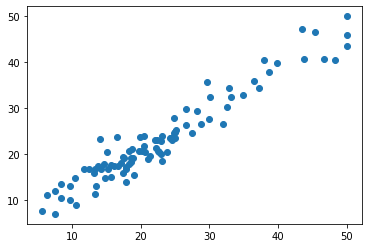

In [26]:
plt.scatter(y_test, y_pred)
plt.show()

## Writing Predictions File

In [27]:
df_test = np.loadtxt('boston_x_test.csv', delimiter = ',')
print(df_test) 

[[ 2.91816626 -0.48772236  1.01599907 ...  0.80657583 -1.59755122
   1.04106182]
 [-0.40339151 -0.48772236  0.40609801 ... -1.13534664  0.44105193
  -0.89473812]
 [-0.4131781  -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.50084979]
 ...
 [-0.41001449  2.08745172 -1.37837329 ... -0.0719129   0.39094481
  -0.68167397]
 [-0.40317611 -0.48772236 -0.37597609 ...  1.13022958  0.34007019
   0.20142086]
 [-0.13356344 -0.48772236  1.2319449  ... -1.73641788 -2.93893082
   0.48877712]]


In [28]:
new_y_Pred = grad_alg1.predict(df_test)
print(new_y_Pred)

[13.46774103 26.53901344 18.23719373 23.31542179 20.71833886 11.34861087
 28.23448241 27.20466005 18.58592906 22.82082365 24.08562654 17.75950066
 19.61025512 20.38437755 52.96808651 20.96252357 23.27880242 23.12023942
 19.75771782 29.79071278 21.25672187 20.39336035 35.83944324 30.35875503
 32.07693164 17.19926228 20.36188922 28.81754768 19.67452244 29.1592
 16.45212848 23.62034466 19.6685148  22.55763194 10.20390203 24.19012353
 23.05897269 20.17811086 22.95072932  8.94014349 20.85369711 23.9735732
 24.1239387  19.11217373 21.76127404 10.58298037 41.72913261 23.67475093
 34.59571904 15.26755332 14.31293613 48.1683396  14.2130776  20.30637018
 16.15939761 20.45624291 19.5456077  20.70055383 15.37673559 16.8606984
 13.68366505 28.37367492 22.28453146 24.04134008 15.70492237 18.38155187
 32.73550749 15.78190718 20.00785139 21.91985999 26.36243001 22.13995041
 16.7781061   8.26175346 35.83279145 22.37415144 24.28390379 23.95684606
 10.28619907 32.95299017 19.76500788 20.24955299 21.29025

In [ ]:
'''with open('Boston_result.csv', 'w') as out:
    out_data = csv.writer(out, delimiter = ',')
    out_data.writerow(new_y_Pred)
print('Done')'''

In [29]:
np.savetxt("Boston_result.csv",new_y_Pred,delimiter=",",fmt='%f')